In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle_data

In [2]:
sns.set_style('whitegrid')
sns.set_color_codes('pastel')

In [3]:
preg_df = pickle_data.get_pickled_data('./nsfg/preg2002.pickle')
resp_df = pickle_data.get_pickled_data('./nsfg/fem_resp2002.pickle')
male_df = pickle_data.get_pickled_data('./nsfg/male2002.pickle')

[Text(0,0.5,'Number of Respondents'), Text(0.5,0,'Computed Respondent Age')]

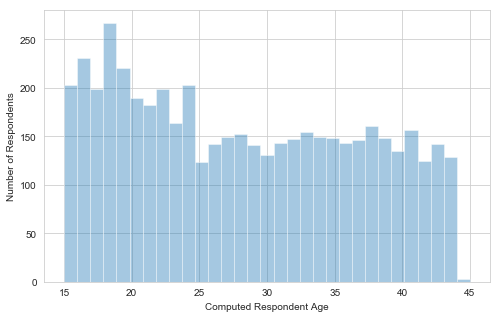

In [4]:
male_age = male_df.age_r
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(male_age, bins=len(male_age.unique()), kde=False)
ax.set(xlabel='Computed Respondent Age', ylabel='Number of Respondents')

percentage 15: 4.12%


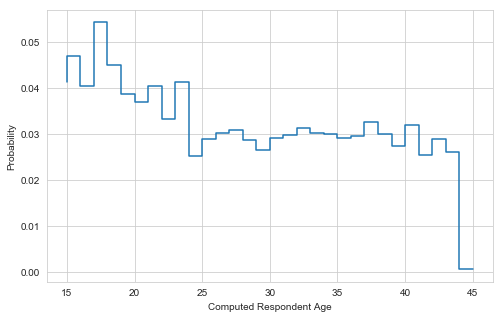

In [5]:
male_age_pmf = male_age.value_counts().sort_index() / len(male_age)
f, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=male_age_pmf, ci=None,
            drawstyle='steps', fillstyle='full')
ax.set(xlabel='Computed Respondent Age', ylabel='Probability')
print('percentage 15:', f'{male_age_pmf.at[15]*100:.2f}%')

[Text(0,0.5,'Number of Respondents'), Text(0.5,0,'Computed Respondent Age')]

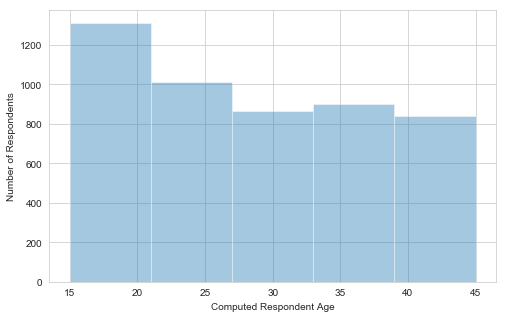

In [6]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(male_age, bins=5, kde=False)
ax.set(xlabel='Computed Respondent Age', ylabel='Number of Respondents')

[Text(0,0.5,'Probability'), Text(0.5,0,'Respondent Birth Century Month')]

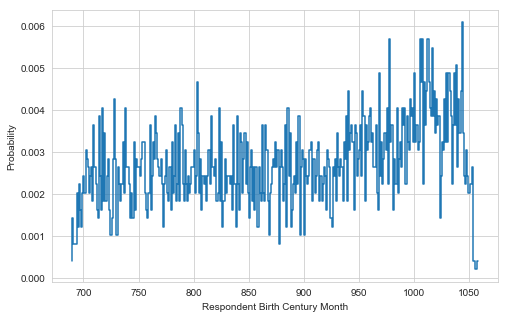

In [7]:
male_cmb = male_df.cmbirth
male_cmb_pmf = male_cmb.value_counts().sort_index() / len(male_cmb)
f, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=male_cmb_pmf, ci=None,
            drawstyle='steps', fillstyle='full')
ax.set(xlabel='Respondent Birth Century Month', ylabel='Probability')

[Text(0,0.5,'Cumulative Probability'),
 Text(0.5,0,'Respondent Birth Century Month')]

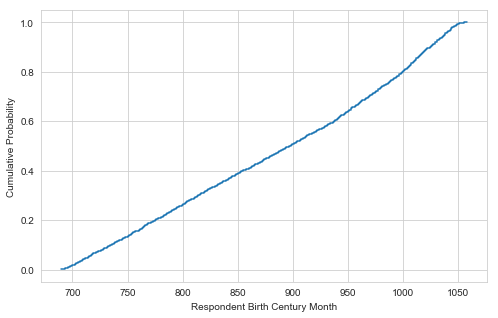

In [8]:
male_cmb_cdf = male_cmb_pmf.cumsum()
f, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=male_cmb_cdf, ci=None,
            drawstyle='steps', fillstyle='full')
ax.set(xlabel='Respondent Birth Century Month',
       ylabel='Cumulative Probability')

In [9]:
top_25 = male_cmb.value_counts(sort=True)[:25].index.values
len([i for i in top_25 if i in range(1000,1026)])

11

[Text(0,0.5,'Probability Density'), Text(0.5,0,'Computed Respondent Age')]

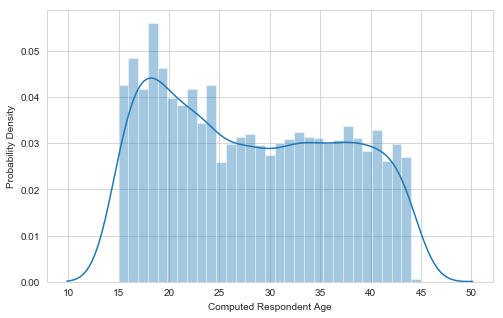

In [10]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(male_age, bins=len(male_age.unique()))
ax.set(xlabel='Computed Respondent Age',
       ylabel='Probability Density')

[Text(0,0.5,'Probability Density'),
 Text(0.5,0,'Respondent Birth Century Month')]

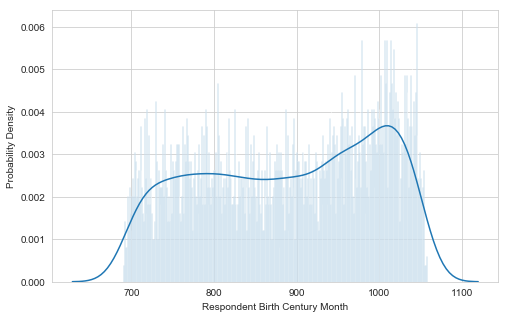

In [11]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(male_cmb, bins=len(male_cmb.unique()))
ax.set(xlabel='Respondent Birth Century Month',
       ylabel='Probability Density')

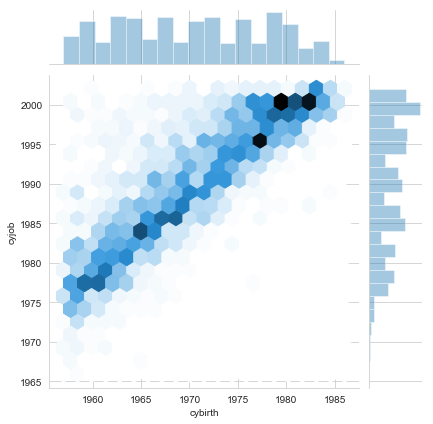

In [12]:
df = male_df[~male_df.cmbfstwk.isin([9998,9999,np.NaN])]
cybirth = pd.Series((df.cmbirth-1)/12+1900, dtype='int64')
cyjob = pd.Series((df.cmbfstwk-1)/12+1900, dtype='int64')
df = df.assign(cybirth = cybirth)
df = df.assign(cyjob = cyjob)
sns.jointplot(x='cybirth', y='cyjob', kind='hex', data=df)